Explained variance by each component:
PC1: 0.16 (16.11%)
PC2: 0.07 (6.85%)


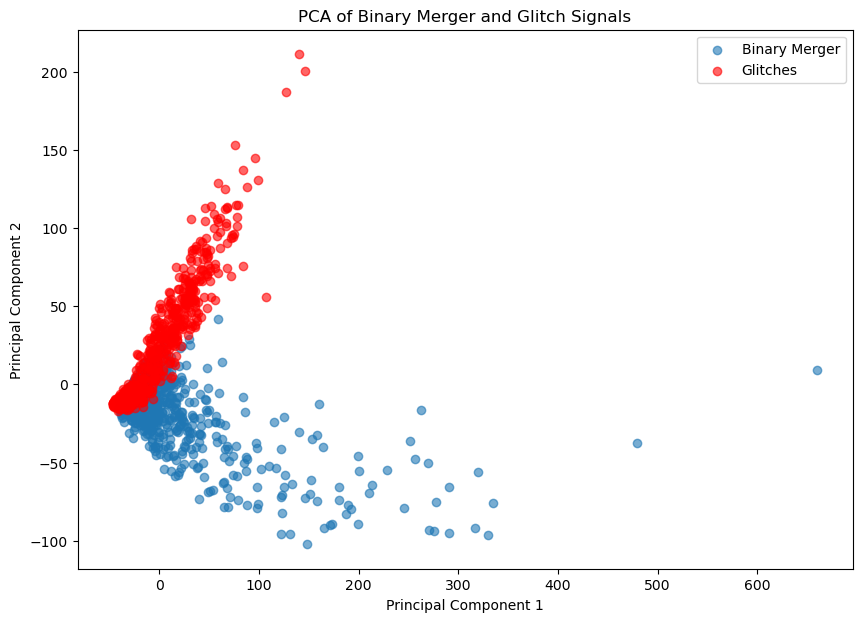

In [5]:
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load and preprocess a single CSV file
def load_and_preprocess_csv(file_path):
    data = pd.read_csv(file_path)

    # Normalize counts for each slice_index
    data['count'] = data.groupby('slice_index')['count'].transform(lambda x: x / x.sum())

    # Normalize bin edges for each slice_index
    data['bin_start'] = data.groupby('slice_index')['bin_start'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
    data['bin_end'] = data.groupby('slice_index')['bin_end'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

    # Flatten the counts and bin edges into one array per signal
    flattened_data = np.concatenate([
        data['slice_index'].values,        # Include slice index
        data['bin_start'].values,          # Include normalized bin start
        data['bin_end'].values,            # Include normalized bin end
        data['count'].values               # Include normalized counts
    ])
    return flattened_data

# Function to load and flatten histograms from directories
def load_and_flatten_histograms_from_dirs(directories):
    combined_data = []
    for directory in directories:
        signal_ids = set([filename.split('_')[1].split('.')[0] for filename in os.listdir(directory) if filename.endswith('.csv')])
        for signal_id in signal_ids:
            pos_file = f'positive_{signal_id}.csv'
            neg_file = f'negative_{signal_id}.csv'
            pos_path = os.path.join(directory, pos_file)
            neg_path = os.path.join(directory, neg_file)
            if os.path.exists(pos_path) and os.path.exists(neg_path):
                pos_data = load_and_preprocess_csv(pos_path)
                neg_data = load_and_preprocess_csv(neg_path)
                
                # Combine positive and negative data
                combined_counts = np.concatenate([pos_data, neg_data])
                combined_data.append(combined_counts)
    return np.array(combined_data)

# Directories
# Define the directories
merger_dirs = [
    '/home/arutkeerthi/Downloads/Glitchveto/Merger_volumes/1200MPC-1-Noisy',
    '/home/arutkeerthi/Downloads/Glitchveto/Merger_volumes/1200MPC-2-Noisy',
    '/home/arutkeerthi/Downloads/Glitchveto/Merger_volumes/1200MPC-3-Noisy',
    '/home/arutkeerthi/Downloads/Glitchveto/Merger_volumes/1000MPC-1-Noisy',
    '/home/arutkeerthi/Downloads/Glitchveto/Merger_volumes/1000MPC-2-Noisy',
    '/home/arutkeerthi/Downloads/Glitchveto/Merger_volumes/1000MPC-3-Noisy',
    '/home/arutkeerthi/Downloads/Glitchveto/Merger_volumes/800MPC-1-Noisy',
    '/home/arutkeerthi/Downloads/Glitchveto/Merger_volumes/800MPC-2-Noisy',
    '/home/arutkeerthi/Downloads/Glitchveto/Merger_volumes/800MPC-3-Noisy',
    '/home/arutkeerthi/Downloads/Glitchveto/Merger_volumes/600MPC-1-Noisy',
    '/home/arutkeerthi/Downloads/Glitchveto/Merger_volumes/600MPC-2-Noisy',
    '/home/arutkeerthi/Downloads/Glitchveto/Merger_volumes/600MPC-3-Noisy'
]
glitch_dir = '/home/arutkeerthi/Downloads/Glitchveto/Glitch_volumes_new'
# Load and flatten data from multiple merger directories and glitch directory
merger_data = load_and_flatten_histograms_from_dirs(merger_dirs)
glitch_data = load_and_flatten_histograms_from_dirs([glitch_dir])

# Combine and scale data
X = np.vstack([merger_data, glitch_data])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.2f} ({var * 100:.2f}%)")

# Visualize PCA
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:len(merger_data), 0], X_pca[:len(merger_data), 1], label='Binary Merger', alpha=0.6)
plt.scatter(X_pca[len(merger_data):, 0], X_pca[len(merger_data):, 1], label='Glitches', alpha=0.6, color='red')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Binary Merger and Glitch Signals')
plt.legend()
plt.show()


In [6]:
# Display the loadings for PC1 and PC2
pc1_loadings = loadings_df.iloc[0]  # First row for PC1
pc2_loadings = loadings_df.iloc[1]  # Second row for PC2

# Print the linear combinations
print("Linear combination for PC1:")
for feature, loading in pc1_loadings.items():
    print(f"{loading:.4f} * {feature}")

print("\nLinear combination for PC2:")
for feature, loading in pc2_loadings.items():
    print(f"{loading:.4f} * {feature}")


Linear combination for PC1:
-0.0042 * positive_bin_1
-0.0030 * positive_bin_2
-0.0016 * positive_bin_3
-0.0010 * positive_bin_4
-0.0007 * positive_bin_5
-0.0002 * positive_bin_6
0.0004 * positive_bin_7
0.0012 * positive_bin_8
0.0020 * positive_bin_9
0.0029 * positive_bin_10
0.0037 * positive_bin_11
0.0045 * positive_bin_12
0.0052 * positive_bin_13
0.0059 * positive_bin_14
0.0065 * positive_bin_15
0.0071 * positive_bin_16
0.0078 * positive_bin_17
0.0083 * positive_bin_18
0.0089 * positive_bin_19
0.0094 * positive_bin_20
0.0100 * positive_bin_21
0.0105 * positive_bin_22
0.0111 * positive_bin_23
0.0115 * positive_bin_24
0.0120 * positive_bin_25
0.0124 * positive_bin_26
0.0128 * positive_bin_27
0.0131 * positive_bin_28
0.0134 * positive_bin_29
0.0137 * positive_bin_30
0.0139 * positive_bin_31
0.0140 * positive_bin_32
0.0142 * positive_bin_33
0.0144 * positive_bin_34
0.0145 * positive_bin_35
0.0147 * positive_bin_36
0.0148 * positive_bin_37
0.0150 * positive_bin_38
0.0151 * positive_bin_39
